In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Activation, Dropout
import time #helper libraries
from sklearn.model_selection import train_test_split

2025-08-16 12:37:43.616285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755347863.880123      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755347863.956834      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# This is a Dataset for Stock Prediction on Apple Inc.
# This dataset start from 1980 to 2021 . It was collected from Yahoo Finance.
# You can perform Time Series Analysis and EDA on data.

input_file="/kaggle/input/apple-stock-price-from-19802021/AAPL.csv"

# load the dataset
df = read_csv(input_file)

In [3]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800


In [4]:
df.shape

(10468, 7)

In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [9]:
df.set_index('Date', inplace=True, drop=True)

In [10]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800


In [11]:
df.sort_index(inplace=True)

In [12]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df[df.columns])

In [14]:
dataset

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [15]:
df_dataset = pd.DataFrame(dataset, columns=df.columns, index=df.index)

In [16]:
df_dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897
...,...,...,...,...,...,...
2022-06-13,0.727462,0.738969,0.733737,0.724501,0.726507,0.016466
2022-06-14,0.728886,0.731806,0.733960,0.729337,0.731356,0.011424
2022-06-15,0.735240,0.750670,0.737758,0.744011,0.746069,0.012333


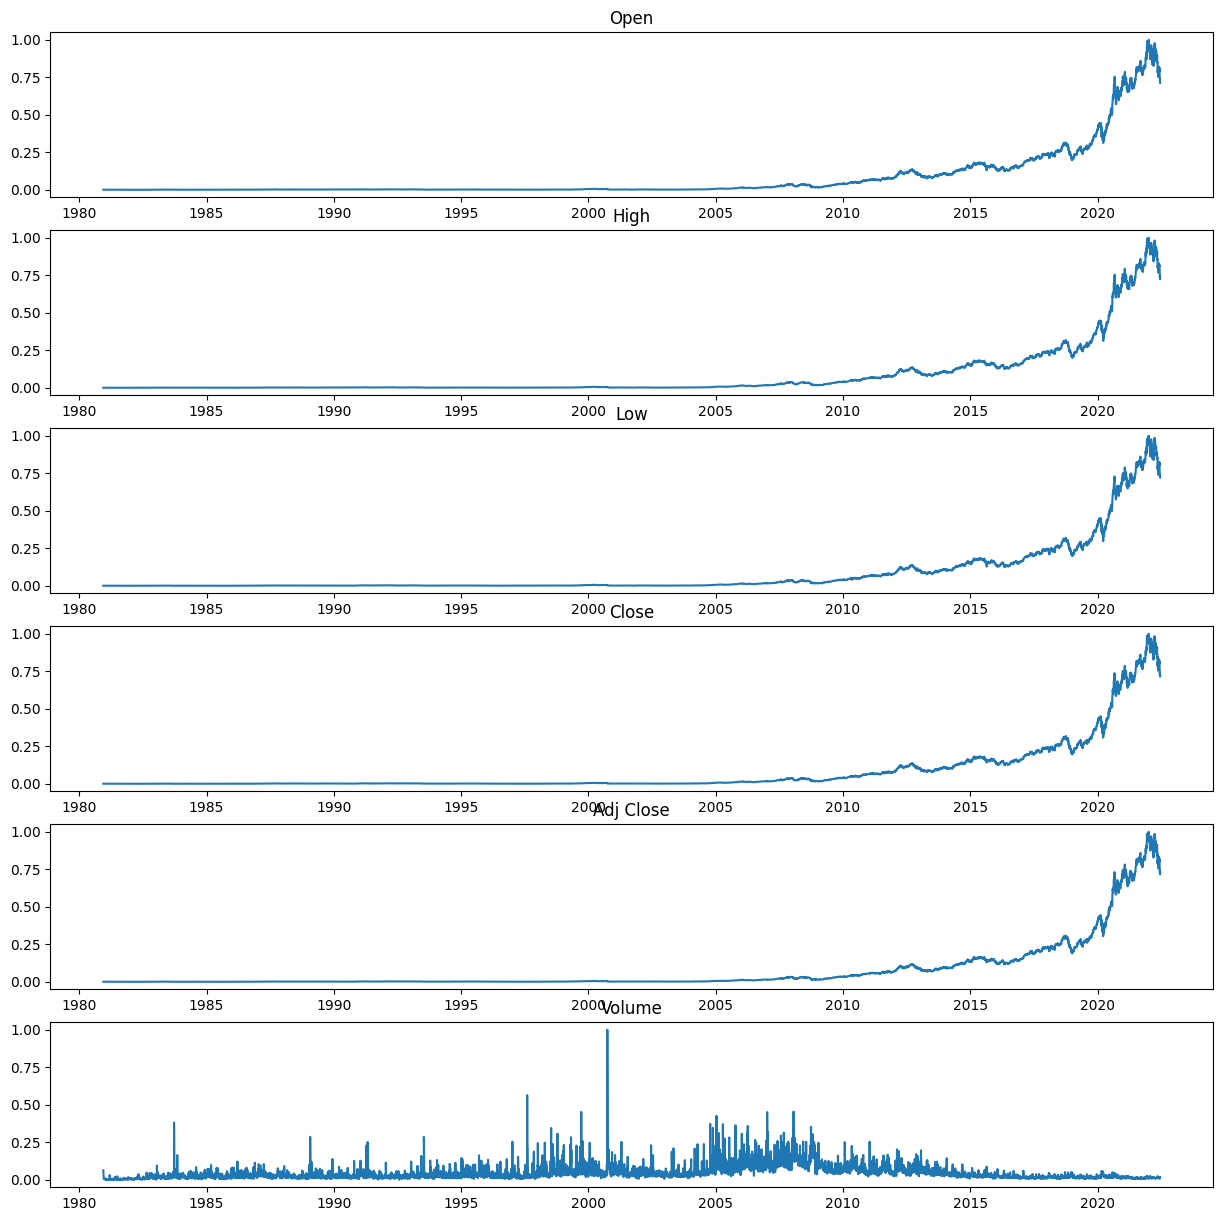

In [17]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_dataset.columns):
    ax.plot(df_dataset[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)

In [18]:
def create_sequence(data, window_size):
    X = []
    y= [] 
    for i in range (window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)


In [19]:
# def create_sequence(data, window_size):
#     X = []
#     y = []
#     for i in range(window_size, len(data)):
#         X.append(data.iloc[i-window_size:i].values)
#         y.append(data.iloc[i].values)
#     return np.array(X), np.array(y)


In [20]:
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# return np.array(dataX), np.array(dataY)

In [21]:
window_size = 60
X, y = create_sequence(df_dataset, window_size)

In [22]:
X.shape , y.shape

((10408, 60, 6), (10408, 6))

In [23]:
# train_size = int(len(dataset) * 0.5)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train.shape, X_test.shape

((8326, 60, 6), (2082, 60, 6))

In [25]:
X_train.shape[1:]

(60, 6)

In [26]:
model = keras.Sequential([
    # 1st LSTM layer
    layers.LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]),
    layers.Dropout(0.3),

    # 2nd LSTM layer
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.3),

    # 3rd LSTM layer
    layers.LSTM(units=50, return_sequences=False),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(y_train.shape[1])   # must match target feature count
])

2025-08-16 12:38:04.854824: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(
    loss='mse', 
    optimizer='adam', 
    metrics=[keras.metrics.RootMeanSquaredError()]
)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',        # What to watch
    patience=10,               # Stop if no improvement for 10 epochs
    restore_best_weights=True  # Roll back to best weights
)


In [29]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Needed for val_loss
    epochs=100,
    batch_size=240,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - loss: 0.0135 - root_mean_squared_error: 0.1124 - val_loss: 6.7316e-04 - val_root_mean_squared_error: 0.0259
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 3.5788e-04 - val_root_mean_squared_error: 0.0189
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 3.1978e-04 - val_root_mean_squared_error: 0.0179
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 2.7588e-04 - val_root_mean_squared_error: 0.0166
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 2.2239e-04 - val_root_mean_squared_error: 0.0149
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 2.1047e-04 - val_root_mean_squared_error: 0.0145
Epoch 7/100
35/35 ━━━

In [30]:
LSTM = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Needed for val_loss
    validation_split=0.2,
    epochs=100,
    batch_size=240,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - loss: 5.8703e-04 - root_mean_squared_error: 0.0242 - val_loss: 1.8330e-04 - val_root_mean_squared_error: 0.0135
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - loss: 5.3540e-04 - root_mean_squared_error: 0.0231 - val_loss: 1.9494e-04 - val_root_mean_squared_error: 0.0140
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - loss: 6.4816e-04 - root_mean_squared_error: 0.0254 - val_loss: 2.3668e-04 - val_root_mean_squared_error: 0.0154
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - loss: 6.3466e-04 - root_mean_squared_error: 0.0252 - val_loss: 2.3037e-04 - val_root_mean_squared_error: 0.0152
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step - loss: 6.1892e-04 - root_mean_squared_error: 0.0249 - val_loss: 1.7633e-04 - val_root_mean_squared_error: 0.0133
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - loss: 6.1202e-04 - root_mean_squared_error: 0.0247 - val_loss: 2.0552e-04 - val_root_mean_squared_error: 0.014

In [31]:
predictions = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


In [32]:
predictions = scaler.inverse_transform(predictions)

In [33]:
y_test_rescaled = scaler.inverse_transform(y_test)

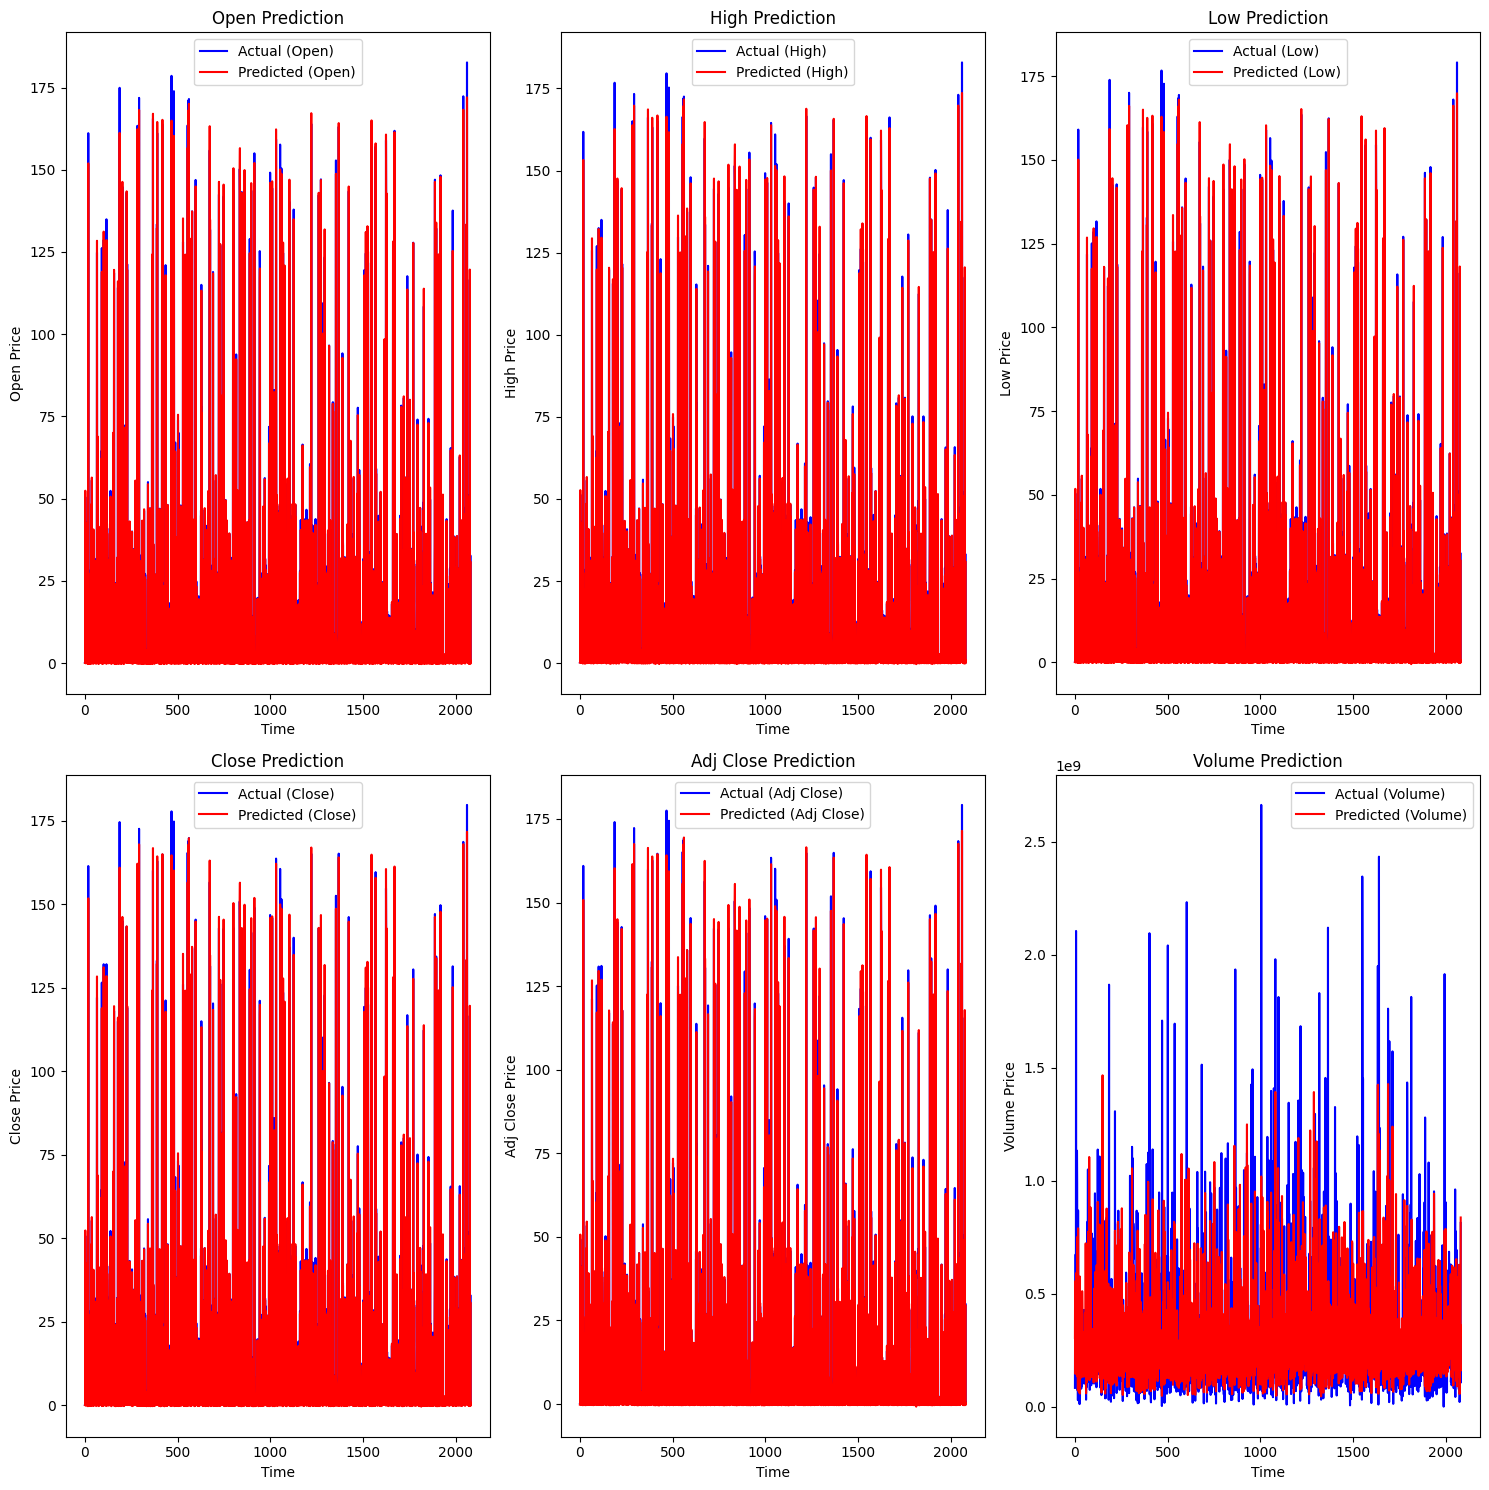

In [34]:
import matplotlib.pyplot as plt

# Assuming: y_test_rescaled and predictions are NumPy arrays of shape (samples, features)
#           df_scaled.columns gives the feature names

for i, col in enumerate(df_dataset.columns):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of plots
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual ({col})')
    plt.plot(predictions[:, i], color='red', label=f'Predicted ({col})')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()
plt.show()


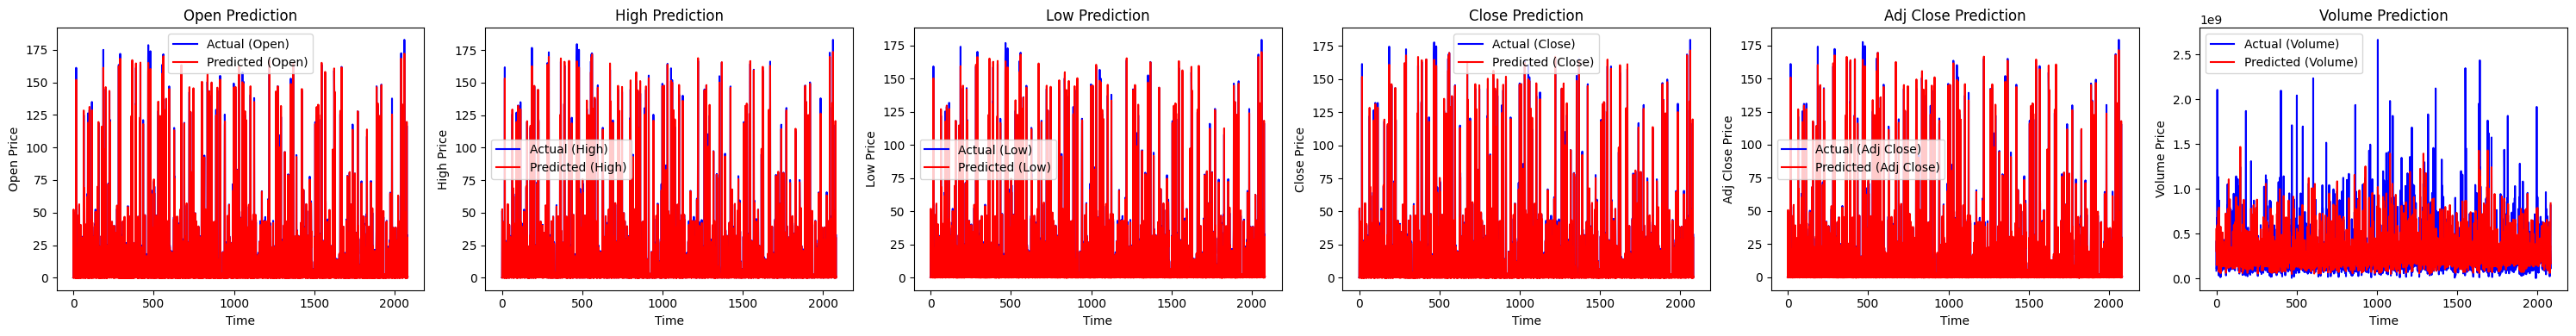

In [35]:
import matplotlib.pyplot as plt

num_features = len(df_dataset.columns)

plt.figure(figsize=(5 * num_features, 4))  # Wider figure for horizontal layout

for i, col in enumerate(df_dataset.columns):
    plt.subplot(1, num_features, i + 1)  # 1 row, N columns
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual ({col})')
    plt.plot(predictions[:, i], color='red', label=f'Predicted ({col})')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()
plt.show()


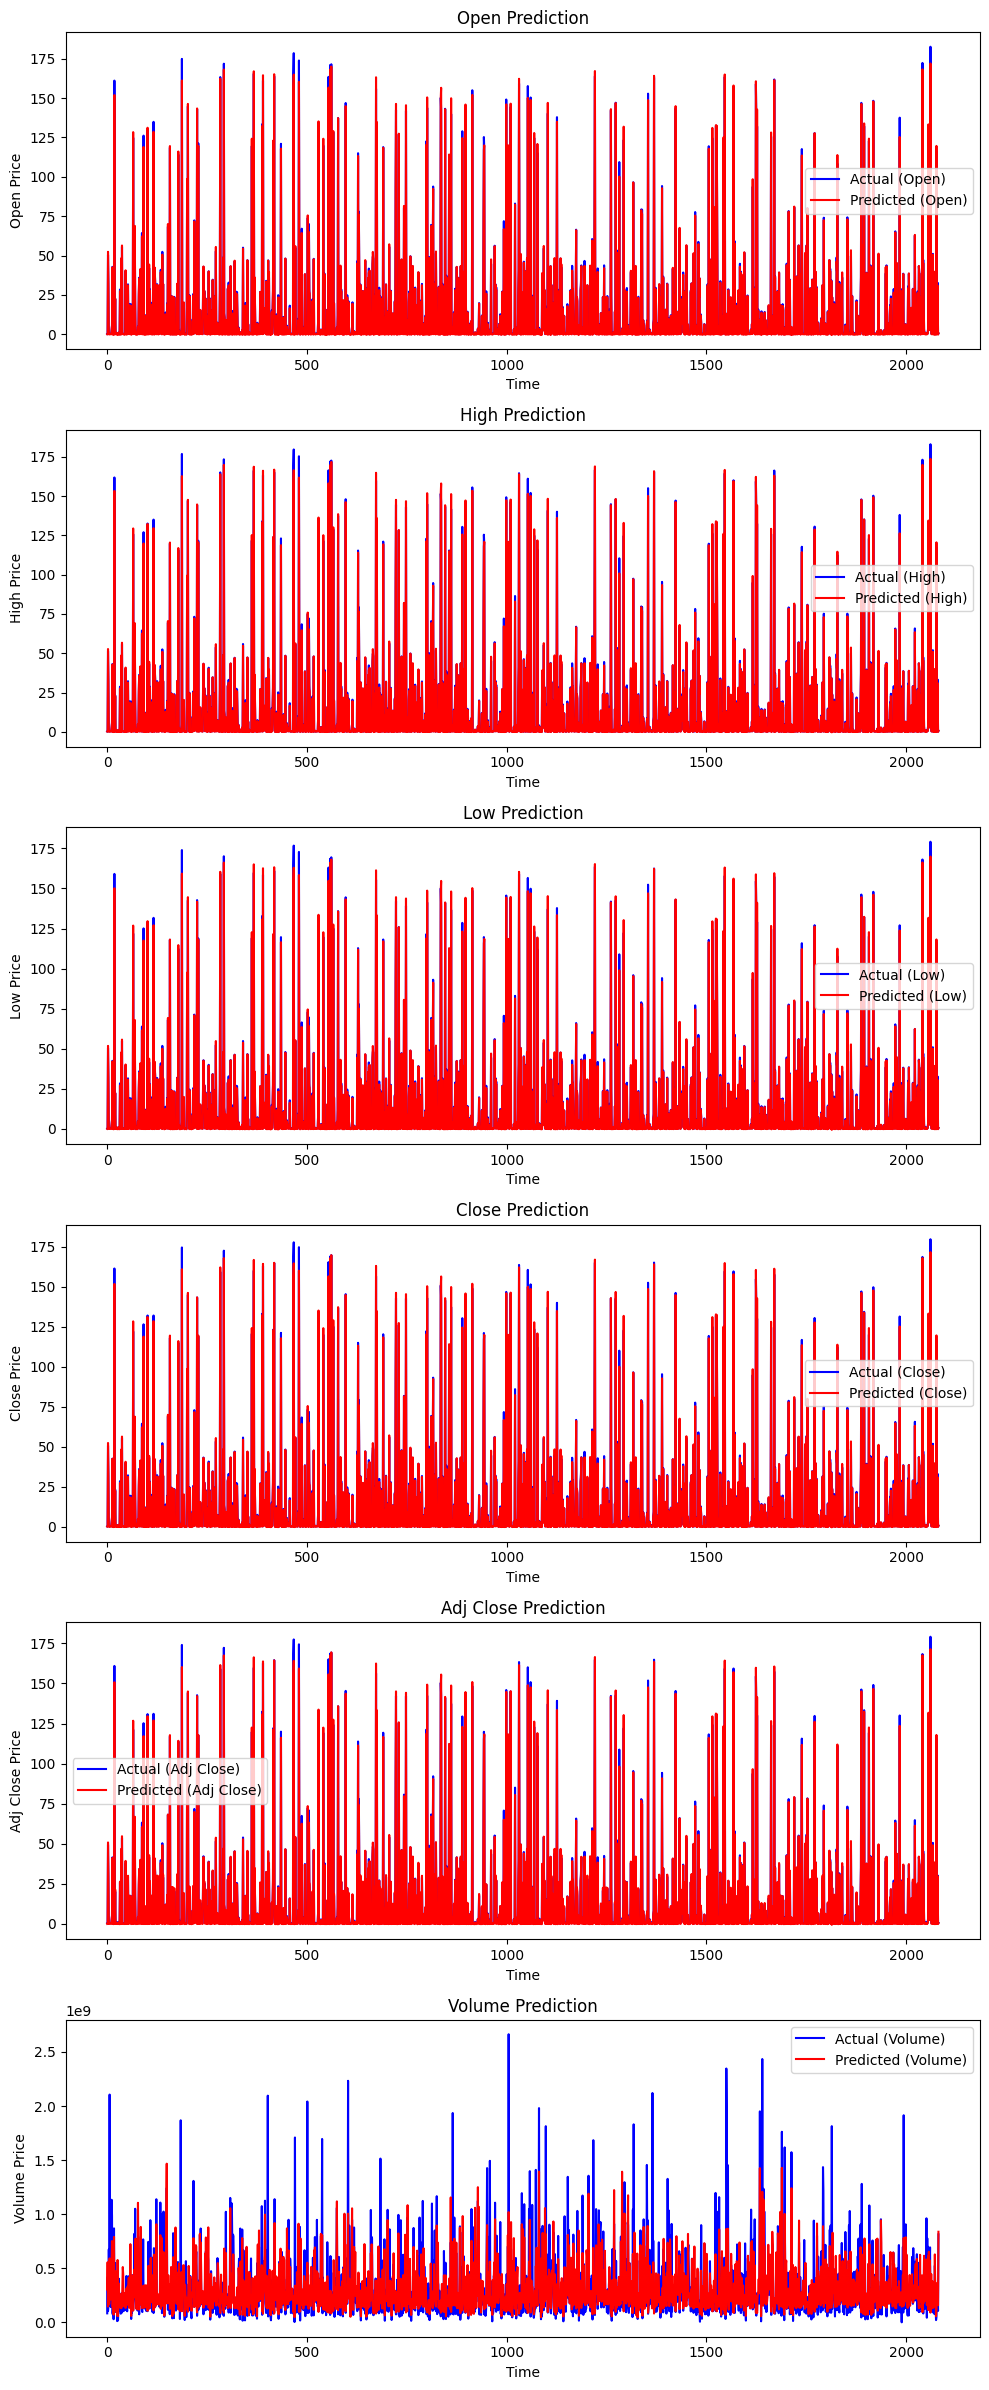

In [36]:
import matplotlib.pyplot as plt

num_features = len(df_dataset.columns)

plt.figure(figsize=(10, 4 * num_features))  # Taller figure for vertical layout

for i, col in enumerate(df_dataset.columns):
    plt.subplot(num_features, 1, i + 1)  # N rows, 1 column
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual ({col})')
    plt.plot(predictions[:, i], color='red', label=f'Predicted ({col})')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()
plt.show()


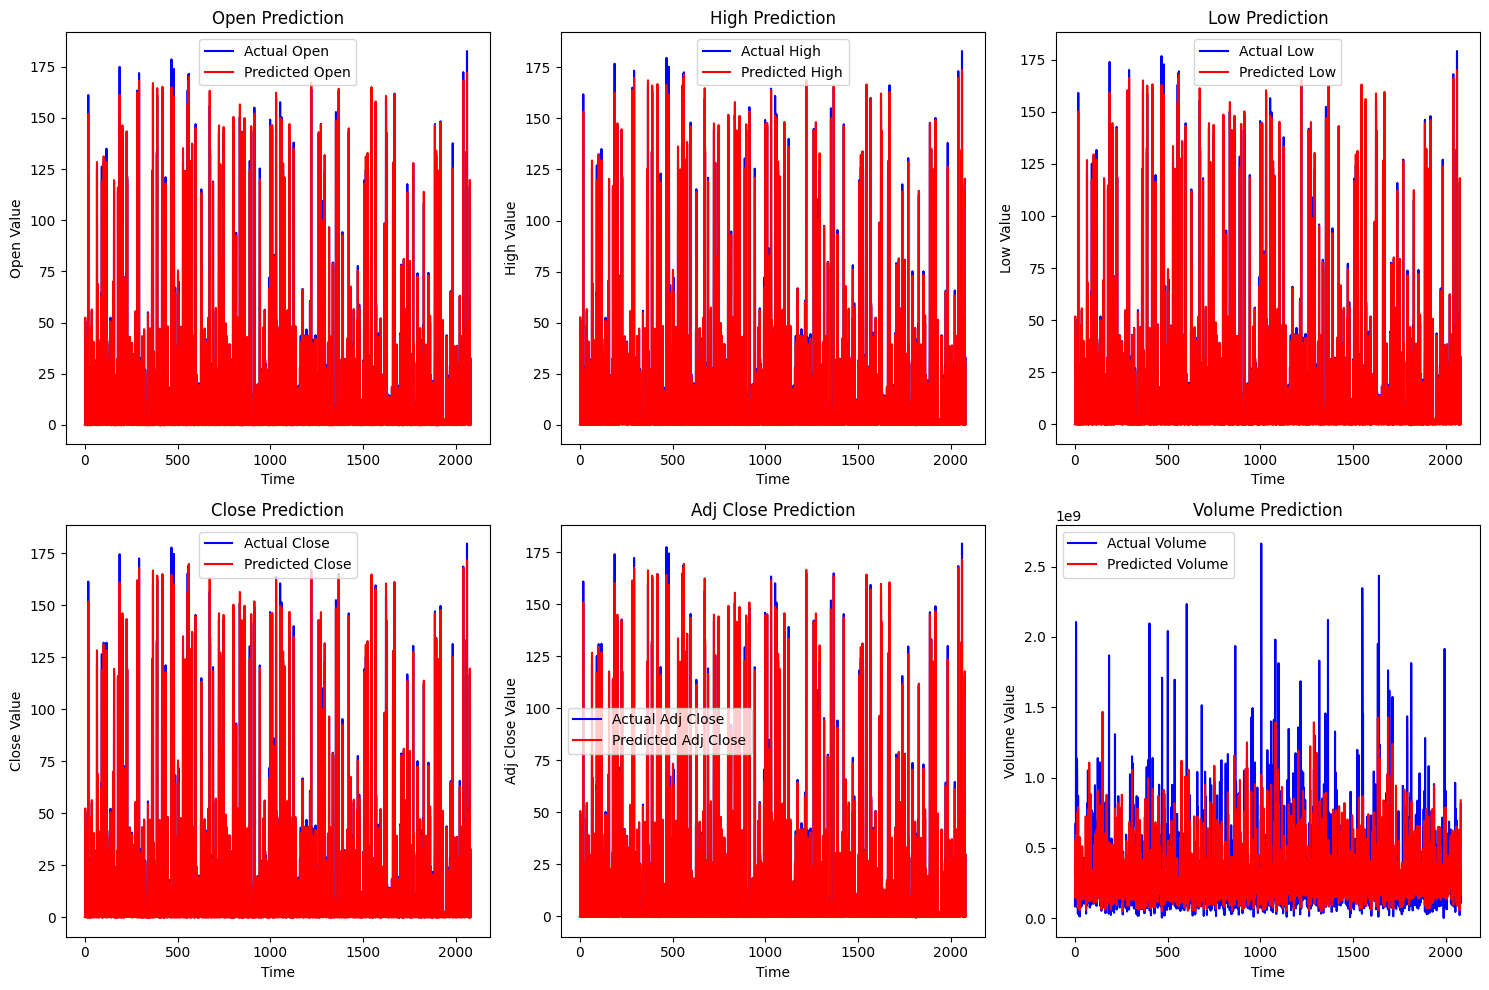

In [37]:
import matplotlib.pyplot as plt
import math

num_features = len(df_dataset.columns)

# Calculate grid size (rows × cols)
cols = 3  # you can change to 2 or 4 depending on your preference
rows = math.ceil(num_features / cols)

plt.figure(figsize=(15, 5 * rows))  # Adjust height automatically

for i, col in enumerate(df_dataset.columns):
    plt.subplot(rows, cols, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Value')
    plt.legend()

plt.tight_layout()
plt.show()


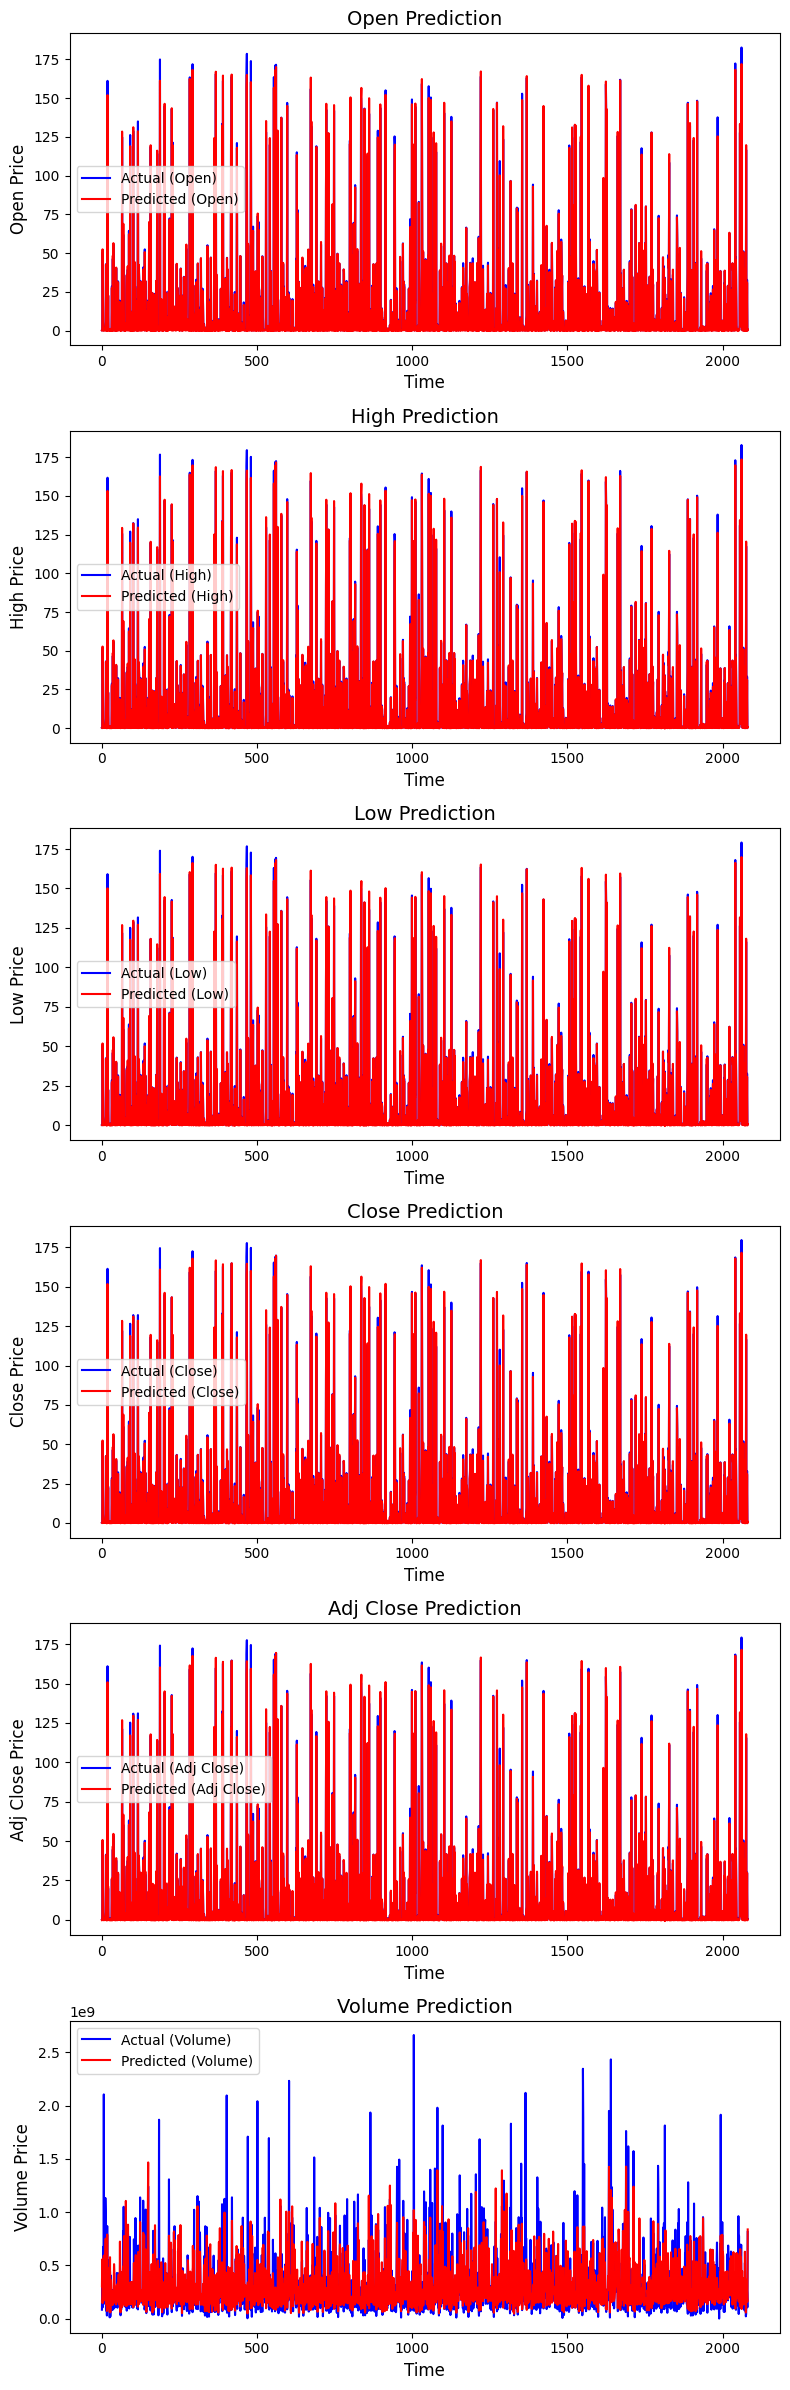

In [38]:
import matplotlib.pyplot as plt

num_features = len(df_dataset.columns)

plt.figure(figsize=(8, 4 * num_features))  # Tall figure

for i, col in enumerate(df_dataset.columns):
    plt.subplot(num_features, 1, i + 1)  # N rows, 1 column
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual ({col})')
    plt.plot(predictions[:, i], color='red', label=f'Predicted ({col})')
    plt.title(f'{col} Prediction', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'{col} Price', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()


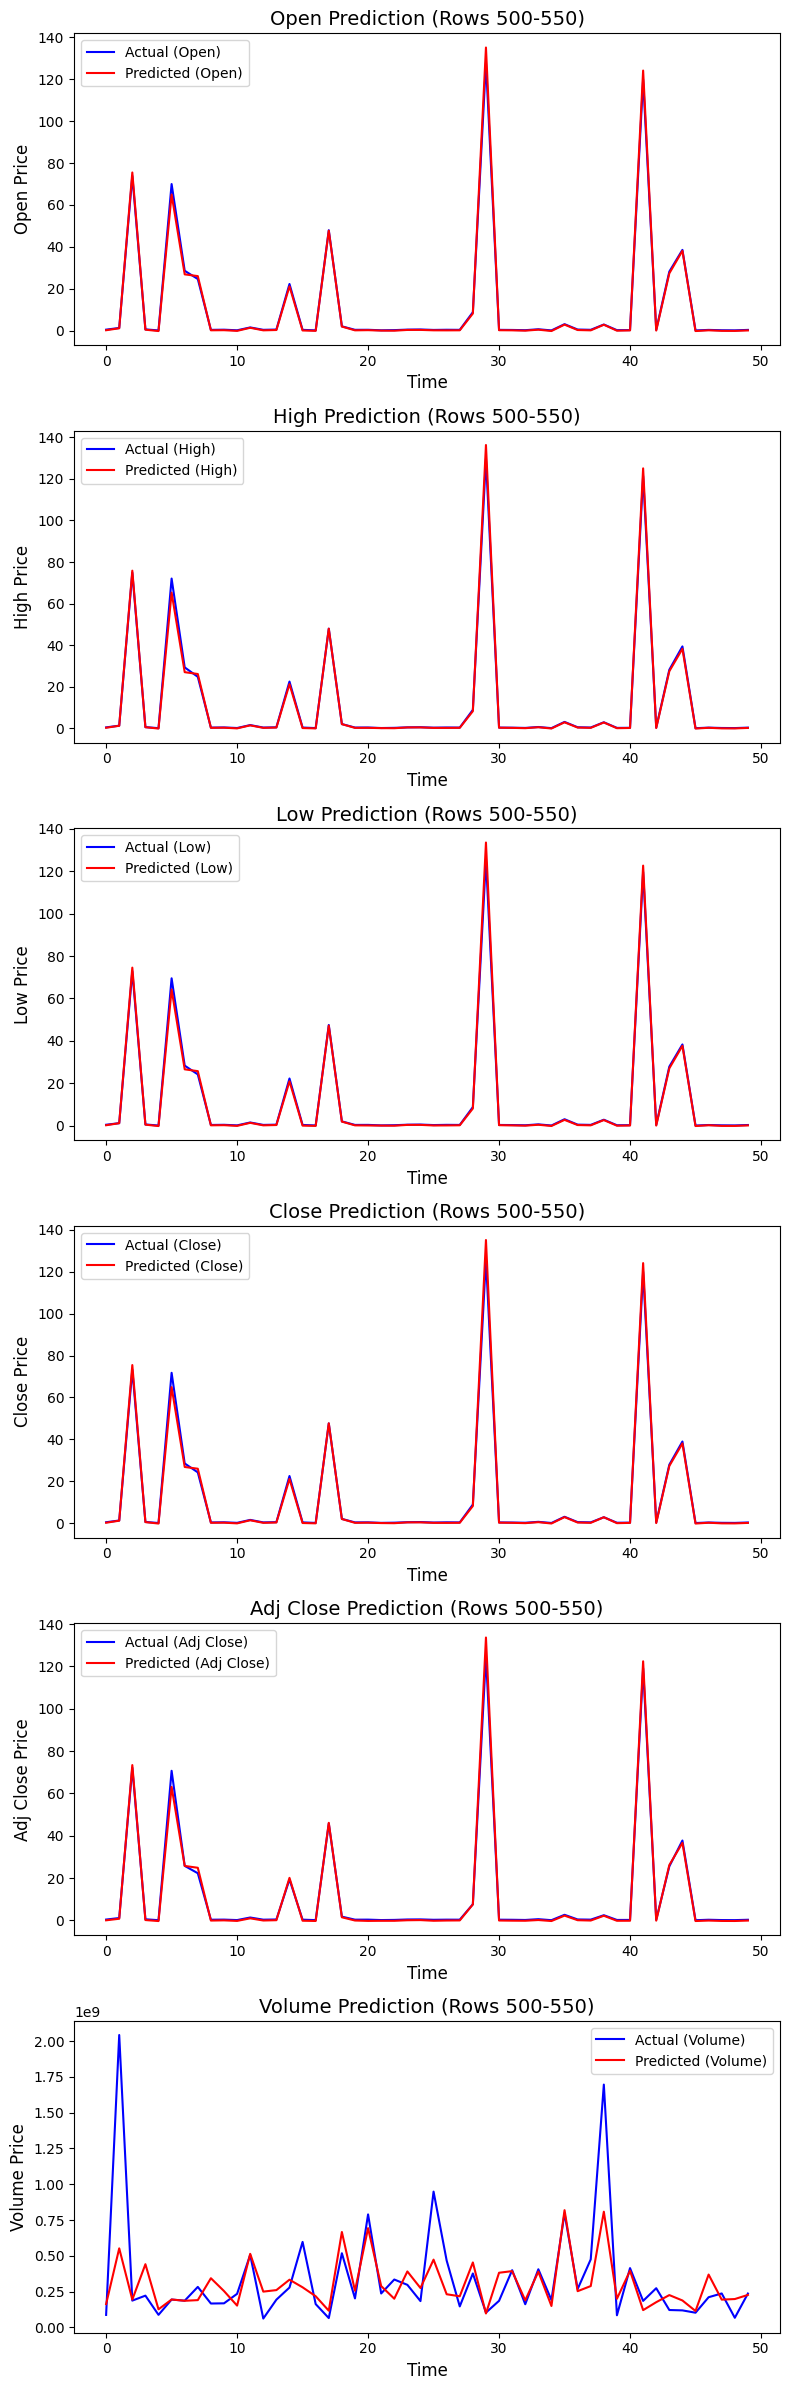

In [39]:
import matplotlib.pyplot as plt

num_features = len(df_dataset.columns)

plt.figure(figsize=(8, 4 * num_features))  # Tall figure

# Zoom range
start, end = 500, 550

for i, col in enumerate(df_dataset.columns):
    plt.subplot(num_features, 1, i + 1)  # N rows, 1 column
    plt.plot(y_test_rescaled[start:end, i], color='blue', label=f'Actual ({col})')
    plt.plot(predictions[start:end, i], color='red', label=f'Predicted ({col})')
    plt.title(f'{col} Prediction (Rows {start}-{end})', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'{col} Price', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()
